EP_01_Iris의 세 가지 품종, 분류해볼 수 있겠어요?
-----
## 학습 전제
---
- scikit-learn을 활용해서 머신러닝을 시도해본 적이 없다.
- scikit-learn에 내장된 분류 모델을 활용해본 적이 없다.
- 지도학습의 분류 실습을 해 본 적이 없다.
- 머신러닝 모델을 학습시켜보고, 그 성능을 평가해본 적이 없다.
## 학습 목표
---
- scikit-learn에 내장된 예제 데이터셋의 종류를 알고 활용할 수 있다.
- scikit-learn에 내장된 분류 모델들을 학습시키고 예측해 볼 수 있다.
- 모델의 성능을 평가하는 지표의 종류에 대해 이해하고, 활용 및 확인해 볼 수 있다.
- Decision Tree, XGBoost, RandomForest, 로지스틱 회귀 모델을 활용해서 간단하게 학습 및 예측해 볼 수 있다.
- 데이터셋을 사용해서 스스로 분류 기초 실습을 진행할 수 있다.

Step
1. 데이터 준비 및 살펴보기
2. 머신러닝 모델 학습을 위한 문제와 정답 준비
3. 머신러닝 모델 학습
4. 머신러닝 모델 평가
5. 머신러닝 모델 변경
6. 머신러닝 정확도의 오류
7. 정답과 오답 나누기
8. 다른 데이터 사용

### 1. 데이터 준비 및 살펴보기

Q1. 자, 여기에서 petal과 sepal이 의미하는 바는 무엇일까요? 한번 직접 검색을 통해 답을 찾아보세요!
* petal : 꽃잎
* sepal : 꽃받침

Q2. scikit-learn이 예제로 제공하는 데이터셋 중 머신러닝 실습을 해 보기 좋은 데이터셋은 크게 Toy datasets과 Real world datasets 두 가지가 있습니다. Toy datasets와 Real world datasets에는 각각 어떤 데이터셋들을 제공하나요?
* Toy datasets : 보스턴 주택 가격, 붓꽃 식물, 당뇨...
* Real world datasets : 올리베티 얼굴, 20 뉴스그룹 텍스트...

요번 시간에 알아본 붓꽃 데이터는 3개의 class와 4개의 attributes를 가진다.

Class
* Iris-Setosa
* Iris-Versicolour
* Iris-Virginica

Attributes
* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

In [29]:
# iris 데이터 불러오기
from sklearn.datasets import load_iris

iris = load_iris()

print(dir(iris))
# dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함.

print(iris.keys())
# iris에 어떤 정보들이 담겨있는지 보여준다.

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [30]:
# iris의 데이터를 변수에 저장한다.
iris_data = iris.data

print(iris_data.shape) 
# shape는 배열의 형상정보를 출력(데이터의 크기)

print(iris_data[0])
# 데이터 하나 확인

(150, 4)
[5.1 3.5 1.4 0.2]


Q3. 우리는 붓꽃의 꽃잎과 꽃받침 길이를 이용해 무엇을 맞추고 싶은 건가요?

* 붓꽃의 종류(class)를 맞추고 싶다.

In [31]:
# 붓꽃 데이터에서 타겟 정보 확인(target, shape, label...)
iris_label = iris.target
print(iris_label.shape)
print(iris_label)
print(iris.target_names)
print(iris.DESCR)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation

Q4. Iris 데이터는 처음 어디에서 사용되었나요?

* The use of multiple measurements in taxonomic problems 논문

In [32]:
print(iris.feature_names)
# feature에 대한 설명
print(iris.filename)
# dataset 전체 이름 - 확장자 확인

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris.csv


### 2. 머신러닝 모델 학습을 위한 문제와 정답 준비


2차원 배열을 다루는데 사용하는 pandas 이용해 역시 2차원 배열의 데이터인 iris를 다룬다.

In [33]:
# pandas import
import pandas as pd

print(pd.__version__)

1.4.3


In [34]:
# iris data를 dataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
# 정답 데이터를 위한 새로운 label column 추가
iris_df["label"] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


* feature : 머신러닝 모델에게 입력되는 데이터(문제)
* label or target : 머신러닝 모델이 맞춰야하는 데이터(정답)
* training dataset : 학습에 사용하는 dataset
* test dataset : 모델 성능 평가에 사용하는 dataset

In [36]:
# train_test_split 함수를 통해 traing datset과 test dataset을 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=7)
# 전체의 20%를 테스트로 사용, 데이터를 분리할 때 랜덤으로 섞기위한 random_state 사용

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  120 , X_test 개수:  30


In [37]:
# 만들어진 dataset 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
#print(X_train, X_test)
print(y_train, y_test)

(120, 4) (120,)
(30, 4) (30,)
[2 1 0 2 1 0 0 0 0 2 2 1 2 2 1 0 1 1 2 0 0 0 2 0 2 1 1 1 0 0 0 1 2 1 1 0 2
 0 0 2 2 0 2 0 1 2 1 0 1 0 2 2 1 0 0 1 2 0 2 2 1 0 1 0 2 2 0 0 2 1 2 2 1 0
 0 2 0 0 1 2 2 1 1 0 2 0 0 1 1 2 0 1 1 2 2 1 2 0 1 1 0 0 0 1 1 0 2 2 1 2 0
 2 1 1 0 2 1 2 1 0] [2 1 0 1 2 0 1 1 0 1 1 1 0 2 0 1 2 2 0 0 1 2 1 2 2 2 1 1 2 2]


### 3. 머신러닝 모델 학습

* 지도 학습 (Supervised Learning) : 정답이 있는 문제를 학습
* 비지도 학습 (Unsupervised Learning) : 정답이 없는 문제를 학습
* 분류 (Classfication) : 데이터를 특정 카테고리 중 하나로 분류해내는 문제
* 회귀 (Regression) : 데이터에 따라 특정 필드의 수치를 맞히는 문제

Q5. 붓꽃 품종 문제는 지도학습인가, 비지도학습인가?
* 답이 있으므로 지도학습

Q6. 붓꽃 품종 문제는 분류 문제인가, 회귀 문제인가요?
* 3가지 품종 중 하나로 분류하는 문제이므로 분류 문제

Q7. 분류 문제와 회귀 문제의 예는 무엇이 있을까요? 검색을 해 보아도 좋고, 떠올려보아도 좋습니다. 예를 한 가지씩만 더 들어봅시다.* 3가지 품종 중 하나로 분류하는 문제이므로 분류 문제
* 분류 문제 : 동물 이미지를 보고 무슨 동물인지 맞추기
* 회귀 문제 : 과학 실험에서 최상의 결과를 도출할 재료 비율의 조합을 예측하기

붓꽃 문제는 지도 학습이고 분류 문제다

Q8. Decision Tree는 한국말로 뭐라고 하나요? 왜 그런 이름이 붙었을까요?
* 의사결정나무
* 형태가 나무를 뒤집어 놓은 모양

Q9. Decision Tree의 단점이 무엇이며, 이를 극복하기 위해 등장한 모델은 무엇인가요? 그 모델은 어떤 원리가 담겨있나요?
* 결정경계가 데이터 축에 수직이어서 특정 데이터에만 잘 작동함.
* 랜덤포레스트
* 같은 데이터에 대해 의사결정나무를 여러개 만들어 그 결과를 종합해 예측 성능을 높이는 기법



In [38]:
# Decision tree 사용하기
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


In [39]:
# 모델 학습
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

### 4. 머신러닝 모델 평가

In [40]:
# 만들어진 머신러닝 모델을 사용하여 test data를 예측
y_pred = decision_tree.predict(X_test)
print("y_pred =", y_pred)
print("y_test =", y_test)

y_pred = [2 1 0 1 2 0 1 1 0 1 2 1 0 2 0 2 2 2 0 0 1 2 1 1 2 2 1 1 2 2]
y_test = [2 1 0 1 2 0 1 1 0 1 1 1 0 2 0 1 2 2 0 0 1 2 1 2 2 2 1 1 2 2]


In [41]:
# 성능 평가 정확도 (Accuracy) 확인
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

### 5. 머신러닝 모델 변경

In [42]:
# 위의 과정 몰아보기
# (1) 필요한 모듈 import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# (2) 데이터 준비
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=7)

# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



랜덤 포레스트 (Random Forest)
* Decision tree를 여러개 모아놓은 구조
* 앙상블 (Ensemble) 기법 : 의견을 통합하거나 여러가지 결과를 합치는 방식

Q10. Random Forest의 Random은 무엇이 랜덤이라는 것을 나타내나요?
* 각 의사 결정 트리를 만들 때 사용하는 요소


In [43]:
# Random Forest를 사용하여 나눈 데이터를 학습 및 평가
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=21)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



Support Vector Machine (SVM)
* Support Vector 와 Hyperplane(초평면)을 이용해서 분류를 수행하는 대표적인 선형 분류 알고리즘
* Decision Boundary (결정 경계) : 두 클래스를 구분해주는 선
* Support Vector : Decision Boundary에 가까이 있는 Data
* Margin : Decision Boundary와 Support Vector 사이의 거리

Margin이 넓을 수록 새로운 데이터를 잘 구분 할 수 있다 = 그만큼 클래스끼리 거리가 멀기 때문 (Margin 최대화 -> robustness 최대화)

In [44]:
# Q11. SVM 모델을 학습시키고, 결과를 확인해 보세요. 아래 코드 셀에서 실행한 후, 정답을 확인하세요.
# SVM 사용해보기
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=22)

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(y_test)
print(y_pred)

print(classification_report(y_test, y_pred))

classifier
[0 2 1 2 1 1 1 2 1 0 2 1 2 2 0 2 1 1 2 1 0 2 0 1 2 0 2 2 2 2]
[0 2 1 2 1 1 1 1 1 0 2 1 2 2 0 2 1 1 1 1 0 2 0 1 2 0 2 2 2 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.77      1.00      0.87        10
           2       1.00      0.79      0.88        14

    accuracy                           0.90        30
   macro avg       0.92      0.93      0.92        30
weighted avg       0.92      0.90      0.90        30



Stochastic Gradient Descent Classifier (SGD Classifier)

In [45]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=22)

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(y_test)
print(y_pred)

print(classification_report(y_test, y_pred))

classifier
[0 2 1 2 1 1 1 2 1 0 2 1 2 2 0 2 1 1 2 1 0 2 0 1 2 0 2 2 2 2]
[0 2 0 2 2 0 0 2 0 0 2 0 2 2 0 2 0 0 2 0 0 2 0 0 2 0 2 2 2 2]
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         6
           1       0.00      0.00      0.00        10
           2       0.93      1.00      0.97        14

    accuracy                           0.67        30
   macro avg       0.44      0.67      0.51        30
weighted avg       0.52      0.67      0.56        30



/home/aiffel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression (선형 회귀)

In [46]:
# Q13. Logistic Regression 모델을 학습시고, 결과를 확인해 보세요. 아래 코드 셀에서 실행한 후, 정답을 확인하세요.
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=22)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(y_test)
print(y_pred)

print(classification_report(y_test, y_pred))

classifier
[0 2 1 2 1 1 1 2 1 0 2 1 2 2 0 2 1 1 2 1 0 2 0 1 2 0 2 2 2 2]
[0 2 1 2 1 1 1 2 1 0 2 1 2 2 0 2 1 1 1 1 0 2 0 1 2 0 2 2 2 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.83      1.00      0.91        10
           2       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.94      0.93      0.93        30



### 6. 머신러닝 정확도의 오류

정확도가 가지는 함정에 대해 알아보기위해 손글씨 데이터인 MNIST dataset으로 확인해보기.

In [47]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [48]:
# digit 변수로 저장 후 확인
digits_data = digits.data
print(digits_data.shape)
print(digits_data[0])

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


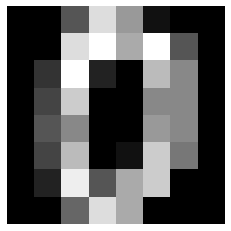

In [49]:
# 0 이미지 보기
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

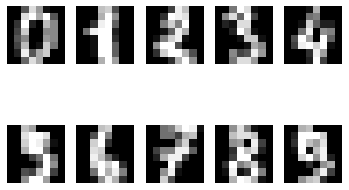

In [50]:
# 0~9 이미지 보기
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [51]:
# target 데이터 확인
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

In [53]:
# Q14. digits_data와 new_label로 Decision Tree 모델을 학습시키고, 정확도를 확인해 보세요. 아래 코드 셀에서 실행한 후, 정답을 확인하세요.
# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(digits.data, new_label, test_size=0.2, random_state=None)

# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=None)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       328
           3       0.83      0.91      0.87        32

    accuracy                           0.97       360
   macro avg       0.91      0.94      0.93       360
weighted avg       0.98      0.97      0.98       360

Accuracy : 0.975


96%라는 훌륭한 결과가 나오지만 학습을 하지않고 다 0을 넣어도 96%의 정확도가 나온다는 뜻도 된다.  
이를 위해 답을 0만 있는 리스트를 넣고 정확도를 구해보자

In [54]:
fake_pred = [0] * len(y_pred)

accuracy = accuracy_score(y_test, fake_pred)
accuracy

0.9111111111111111

0만 찍어도 88%가 나온다. 이러한 문제는 불균형한 데이터(unbalanced data)에서 자주 발생할 수 있습니다.

### 7. 정답과 오답 나누기

정확도는 정답인 데이터를 모델이 정답으로 보는 것만 고려하는 것, 오답인 데이터를 오답으로 보는지도 확인해야한다.  
이러한 정답과 오답을 구분하여 표현하는 방법을 오차 행렬 (confusion matirx)이라고 한다.

Q15. 오차 행렬에서는 예측 결과를 네 가지로 구분합니다. 각각은 무엇인가요?
* True Positive : 맞는 데이터를 맞다고 함
* False Negative : 맞는 데이터를 아니라고 함
* False Positive : 아닌 데이터를 맞다고 함
* True Negative : 아닌 데이터를 아니라고 함

Q16. 글에서는 오차 행렬에서 나타나는 성능 지표를 다섯 가지 소개하였습니다. 각각은 무엇인가요?
* Sensitivity(Recall) : 맞는 데이터에 대한 예측
* Specificity : 아닌 데이터에 대한 예측
* Precision : 제대로 맞다고 판단하는지
* Negative Predictive Value : 제대로 틀리다고 판단하는지
* Accuracy : 전체 비율에 대해 맞게 판단하는지

이들 중에서 Precision, Sensitivity(Recall)와 F1 score(Precison과 F1 score의 조화 평균)가 많이 쓰인다.  
F1 score = 2 * (Precision * Recall) / (Precision  + Recall)  

Q17. 전체 메일함에서 스팸 메일을 거르는 모델에게는 Precision이 더 중요할까요, Recall이 더 중요할까요? (스팸 메일을 positive, 정상 메일을 negative로 생각합니다)
* Precision, 중요한 메일이 스팸처리 될 수 있다.

Q18. 암 환자를 진단하는 모델에게는 Precision, Recall 중 무엇이 더 중요한가요?
* Recall, 암을 가지고 있는데 암을 발견하지 못하는게 더 중요하기 때문

In [55]:
# 손글씨에 대한 예측값, 가짜 예측값의 오차 행렬과 각각의 리포트 확인
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred))

print(confusion_matrix(y_test, fake_pred))

print(classification_report(y_test, y_pred))

print(classification_report(y_test, fake_pred, zero_division=0))

[[322   6]
 [  3  29]]
[[328   0]
 [ 32   0]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       328
           3       0.83      0.91      0.87        32

    accuracy                           0.97       360
   macro avg       0.91      0.94      0.93       360
weighted avg       0.98      0.97      0.98       360

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       328
           3       0.00      0.00      0.00        32

    accuracy                           0.91       360
   macro avg       0.46      0.50      0.48       360
weighted avg       0.83      0.91      0.87       360



In [56]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.975, 0.9111111111111111)

### 8. 다른 데이터 사용

Q19. load_wine 데이터는 총 몇 개로 이루어져 있나요? feature와 label은 각각 무엇을 나타내나요?
* 178개
* feature : Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline
* label : class_0, 1,2 와인의 종류(types of cultivators)

Q20. load_breast_cancer 데이터는 총 몇 개로 이루어져 있나요? feature와 label은 각각 무엇을 나타내나요?
* 569개
* feature : radius, texture, perimeter, area, smoothness, compactness...
* label : WDBC-Malignant, WDBC-Benign